<img src="images/logo/eooffshore_banner.png" width="48%" />&nbsp;

<img src="images/logo/seai.png" width="25%" /> <span /> <img src="images/logo/ucd.png" width="7%" />

# ASCAT Wind Data for Irish Continental Shelf region

## Introduction

The [Copernicus Marine Service (CMS), or Copernicus Marine Environment Monitoring Service (CMEMS)](https://marine.copernicus.eu/), is the marine component of the [European Union Copernicus Earth Observation (EO) programme](https://www.copernicus.eu/en/about-copernicus). It provides free, regular and systematic ocean data products on a global and regional scale. The CMS [Surface Wind Thematic Assembly Center (Wind TAC)](https://marine.copernicus.eu/about/producers/wind-tac) is responsible for the collection, processing, qualification and distribution of surface winds data products derived from scatterometer satellite missions, including near-real time (NRT) and delayed mode (REP) processing of global wind observations. The focus of this notebook is on the CMS wind speed and direction data products generated using the [Advanced SCATterometer (ASCAT)](https://www.eumetsat.int/ascat) instruments deployed on the [Metop satellites](https://www.eumetsat.int/our-satellites/metop-series). Further details and examples of ocean wind analysis using ASCAT data products are described in the following publications:

* [Hasager et al. (2015) - Offshore wind climatology based on synergetic use of Envisat ASAR, ASCAT and QuikSCAT](https://doi.org/10.1016/j.rse.2014.09.030)
* [Carvalho et al. (2017) - Offshore winds and wind energy production estimates derived from ASCAT, OSCAT, numerical
weather prediction models and buoys – A comparative study for the Iberian Peninsula Atlantic coast](https://doi.org/10.1016/j.renene.2016.10.063)
* [Karagali et al. (2018) - New European wind atlas offshore](https://iopscience.iop.org/article/10.1088/1742-6596/1037/5/052007)
* [Remmers et al. (2019) - The Potential of Advanced Scatterometer (ASCAT) 12.5 km Coastal Observations for Offshore Wind
Farm Site Selection in Irish Waters](https://doi.org/10.3390/en12020206)
* [Hasager et al. (2020) - Europe’s offshore winds assessed with synthetic aperture radar, ASCAT and WRF over France](https://doi.org/10.5194/wes-5-375-2020)
* [ASCAT Wind Product User Manual (1.17, 01/12/2021)](https://scatterometer.knmi.nl/publications/pdf/ASCAT_Product_Manual.pdf)

This notebook provides details of:
1. ASCAT wind data products retrieval from the CMS.
1. The creation of the ASCAT Zarr wind stores that are included in the EOOffshore catalog.
1. A brief look at these Zarr stores, including a demonstration of wind speed calculation.

These ASCAT Zarr stores have been uploaded to [Zenodo](https://zenodo.org/record/6976298).

**How to cite:** 
1. O'Callaghan, D. and McBreen, S.: Scalable Offshore Wind Analysis With Pangeo, EGU General Assembly 2022, Vienna, Austria, 23–27 May 2022, EGU22-2746, [https://doi.org/10.5194/egusphere-egu22-2746](https://doi.org/10.5194/egusphere-egu22-2746), 2022.
1. [O'Callaghan, D. and McBreen, S.: EOOffshore: ASCAT Wind Data for the Irish Continental Shelf Region,  (1.0.0) [Data set], Zenodo, 2022.](https://zenodo.org/record/6976298) [![https://doi.org/10.5281/zenodo.6976298](https://zenodo.org/badge/DOI/10.5281/zenodo.6976298.svg)](https://doi.org/10.5281/zenodo.6976298)

**Note: more extensive usage of the EOOffshore ASCAT Zarr stores may be found in the following notebooks:**
* [Offshore Wind in Irish Areas Of Interest](./Offshore_Wind_AOI.ipynb)
* [Comparison of Offshore Wind Speed Extrapolation and Power Density Estimation](./Comparison_Wind_Power.ipynb)


-----------------------------------------------------
## ASCAT Wind Data Products

The EOOffshore project uses the following CMS data sets providing ASCAT wind products:
* [*Global Ocean Daily Gridded Reprocessed (REP) Level-3 Sea Surface Winds from Scatterometer*](https://resources.marine.copernicus.eu/product-detail/WIND_GLO_WIND_L3_REP_OBSERVATIONS_012_005/INFORMATION)
* [*Global Ocean Daily Gridded Near Real Time (NRT) Level-3 Sea Surface Winds from Scatterometer*](https://resources.marine.copernicus.eu/product-detail/WIND_GLO_WIND_L3_NRT_OBSERVATIONS_012_002)

Both data sets contain the following relevant variables:

| Variable | Unit | Height (metres above sea level) | Description |
| ----------- | ----------- | ----------- | ----------- |
| `wind_speed` | $m s^{-1}$ | 10 | stress equivalent wind speed |
| `wind_to_dir` | degree | 10 | wind direction |
| `wvc_quality_flag` | flag mask | n/a | wind vector cell quality |
| `air_density` | $kg$ $m^{-3}$ | 10 | air density |

ASCAT products featuring 0.125 degree grids, based on 12.5 km scatterometer swath observations, are available for all combinations of Metop A/B (REP) and Metop A/B/C (NRT) satellites and ASCending, DEScending passes. Although products can be manually downloaded manually from the [MOTU Service server](https://my.cmems-du.eu/motu-web/Motu?action=listcatalog&service=WIND_GLO_WIND_L3_REP_OBSERVATIONS_012_005-TDS), automated retrieval is achieved using the [Python MOTU Client API](https://help.marine.copernicus.eu/en/articles/4796533-what-are-the-motu-client-motuclient-and-python-requirements). Monthly ASCAT REP and NRT products covering the [Irish Continental Shelf (ICS)](https://www.marine.ie/Home/site-area/irelands-marine-resource/real-map-ireland) region coordinates were retrieved for all available satellite and pass combinations:

|       | **Reprocessed (REP)** | **Near Real Time (NRT)**  |
| ----------- | ----------- | ----------- |
| **Observation / Models** | satellite-observation | satellite-observation |
| **Product type** | multi-year | near-real-time |
| **Processing level** | Level-3 | Level-3 |
| **Data type** | Gridded (latitude/longitude) | Gridded (latitude/longitude) |
| **Horizontal coverage** | ICS bounding box [58, -26, 46, -4] | ICS bounding box [58, -26, 46, -4] |
| **Horizontal resolution** | 0.125° × 0.125° | 0.125° × 0.125° |
| **Vertical coverage** | Single level | Single level |
| **Temporal coverage** | 2007-01-01T22:00:20 to 2021-07-31T21:42:48 | 2016-01-01T10:56:24 to 2021-09-30T21:53:36 |
| **Temporal resolution** | Daily instantaneous (1-4 times daily <br/> for Metop-A/B, ASC/DES combinations | Daily instantaneous (1-6 times daily <br/> for Metop-A/B/C, ASC/DES combinations |
| **Update frequency** | Quarterly | Daily |
| **File format** | NetCDF-4 | NetCDF-4 |
| **Total retrieved products** | 412 | 324 |
| **Total products size** | 21G | 16G |


Note:
* Metop-A and Metop-B REP products are available from 2007 and 2019 respectively. No REP products are currently available for Metop-C.
* Metop-C NRT products are available from October 2019.

-----------------------------------------------------
## ASCAT Wind Zarr Stores

The `time` dimension for a particular month is distributed across:
* REP: 1-4 NetCDF monthly products for the Metop-A/B and ASC/DES combinations
* NRT: 1-6 NetCDF monthly products for the Metop-A/B/C and ASC/DES combinations

Consequently, each set of REP/NRT monthly products was concatenated into a single interim product, containing a new `time` dimension coordinate based on the `measurement_time` variable in the original products. As `measurement_time` isn't uniform for a particular product across the grid latitude/longitude coordinates, the spatial mean was used. Next, these interim products were loaded using [`xarray.open_mfdataset()`](https://xarray.pydata.org/en/stable/generated/xarray.open_mfdataset.html), combined by their grid coordinates and concatenated along the `time` dimension. A `height` dimension was also added for the `wind_speed` and `wind_to_dir` variables. Each data set was persisted to a single, chunked, compressed [Zarr](https://zarr.readthedocs.io/en/stable/) store (REP: 14GB, NRT: 11GB), which is a cloud-optimised format suitable for multi-dimensional arrays. A `time` chunk size was specified that resulted in a low number of `time` chunks, as this approach is more suitable for subsequent processing of variables over time for Areas Of Interest (AOIs).

As requested by the [Copernicus Marine Service Service Commitments and Licence](https://marine.copernicus.eu/user-corner/service-commitments-and-licence), these Zarr stores were:
* Generated using E.U. Copernicus Marine Service Information; https://doi.org/10.48670/moi-00182; https://doi.org/10.48670/moi-00183; 

-----------------------------------------------
## ASCAT in EOOffshore Catalog

Imports required for subsequent processing

In [1]:
%matplotlib inline
import cartopy.crs as ccrs
from intake import open_catalog
import itertools
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shapely.geometry as sgeom
import xarray as xr

sns.set_style('whitegrid', {'axes.labelcolor': '0', "text.color": '0', 'xtick.color': '0', 'ytick.color': '0', 'font.sans-serif': ['DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],})
sns.set_context('notebook', font_scale=1)

### Open the catalog and view the ASCAT metadata

All EOOffshore data sets, including the ASCAT Zarr stores described above, are accessible using the EOOffshore [Intake](https://intake.readthedocs.io/en/latest/) catalog. Each [catalog](https://intake.readthedocs.io/en/latest/catalog.html) entry provides a description and metadata associated with the corresponding data set, defined in a [YAML configuration file](https://intake.readthedocs.io/en/latest/catalog.html#yaml-format). The EOOffshore catalog configuration was originally influenced by the [Pangeo Cloud Data Store atmosphere.yaml catalog configuration](https://github.com/pangeo-data/pangeo-datastore/blob/master/intake-catalogs/atmosphere.yaml). 

In [2]:
catalog = open_catalog('data/intake-catalogs/eooffshore_ics.yaml')

View the REProcessed ASCAT Zarr store metadata

In [3]:
catalog.eooffshore_ics_cms_WIND_GLO_WIND_L3_REP_OBSERVATIONS_012_005_MetOp_ASCAT

eooffshore_ics_cms_WIND_GLO_WIND_L3_REP_OBSERVATIONS_012_005_MetOp_ASCAT:
  args:
    storage_options: null
    urlpath: /data/eo/zarr/cmems/WIND_GLO_WIND_L3_REP_OBSERVATIONS_012_005/eooffshore_ics_cmems_WIND_GLO_WIND_L3_REP_OBSERVATIONS_012_005_MetOp_ASCAT.zarr
  description: EOOffshore Project 2016 - 2021 Concatenated Copernicus Marine Service
    WIND_GLO_WIND_L3_REP_OBSERVATIONS_012_002 MetOp ASCAT Ascending/Descending products,
    for the Irish Continental Shelf. Original products time coordinates have been
    replaced with the satellite/pass measurement_time values. Generated using E.U.
    Copernicus Marine Service Information; https://doi.org/10.48670/moi-00183
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: /opt/eooffshore/notebooks/datasets/data/intake-catalogs/
    tags:
    - atmosphere
    - wind
    - metop
    - ascat
    - ocean
    - cmems
    title: CMEMS Global Ocean - Wind - METOP-A/B ASCAT - 12km daily Ascending/Descending
      V2 combined 

View the Near Real Time ASCAT Zarr store metadata

In [4]:
catalog.eooffshore_ics_cms_WIND_GLO_WIND_L3_NRT_OBSERVATIONS_012_002_MetOp_ASCAT

eooffshore_ics_cms_WIND_GLO_WIND_L3_NRT_OBSERVATIONS_012_002_MetOp_ASCAT:
  args:
    storage_options: null
    urlpath: /data/eo/zarr/cmems/WIND_GLO_WIND_L3_NRT_OBSERVATIONS_012_002/eooffshore_ics_cmems_WIND_GLO_WIND_L3_NRT_OBSERVATIONS_012_002_MetOp_ASCAT.zarr
  description: EOOffshore Project 2016 - 2021 Concatenated Copernicus Marine Service
    WIND_L3_NRT_OBSERVATIONS_012_002 MetOp ASCAT Ascending/Descending products, for
    the Irish Continental Shelf. Original products time coordinates have been replaced
    with the satellite/pass measurement_time values. Generated using E.U. Copernicus
    Marine Service Information; https://doi.org/10.48670/moi-00182
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: /opt/eooffshore/notebooks/datasets/data/intake-catalogs/
    tags:
    - atmosphere
    - wind
    - metop
    - ascat
    - ocean
    - cmems
    title: CMEMS Global Ocean - Wind - METOP-A/B/C ASCAT - 12km daily Ascending/Descending
      V2 combined product

----------------------------------------------------------------
### Load the catalog ASCAT Zarr store into an `xarray.Dataset`

Intake catalog entries typically specify a [driver](https://intake.readthedocs.io/en/latest/catalog.html#driver-selection) to be used when loading the corresponding data set. The ASCAT entries specify [`intake_xarray.xzarr.ZarrSource`](https://intake-xarray.readthedocs.io/en/latest/api.html#intake_xarray.xzarr.ZarrSource), a driver implementation provided by the [intake-xarray](https://intake-xarray.readthedocs.io/) library. This enables NetCDF and Zarr data sets to be loaded using [xarray](https://docs.xarray.dev/en/stable/index.html), a library for processing N-D labeled arrays and datasets. As xarray labels take the form of dimensions, coordinates and attributes on top of [NumPy](https://numpy.org/)-like arrays, it is particularly suited to data sets such as ASCAT whose variables feature latitude/longitude grid coordinates.

This intake driver will load the associated dataset into an [`xarray.Dataset`](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html). To enable support for potentially large data sets, the [`to_dask()`](https://intake.readthedocs.io/en/latest/quickstart.html?#working-with-dask) function is used to load the underlying variable arrays with [Dask](https://docs.dask.org/en/latest/), a parallel, out-of-core computing library. The [`ZarrSource`](https://intake-xarray.readthedocs.io/en/latest/api.html#intake_xarray.xzarr.ZarrSource) implementation will load the data set variables into [Dask arrays](https://docs.dask.org/en/latest/array.html), which will be loaded and processed in parallel as [chunks](https://docs.dask.org/en/latest/array.html) during subsequent computation. As discussed above, variable chunk sizes may be specified during Zarr store creation.

Here is the ASCAT REProcessed store loaded into an [`xarray.Dataset`](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html):

* All variables have associated coordinate dimensions:
  * `time` - observation time
  * `latitude` and `longitude` - the corresponding coordinate grid
* The `wind_speed` and `wind_to_dir` variables have a `height` coordinate dimension, reflecting the 10m (above sea level) variables in the products retrieved from the CMS.
* A low number of `time` chunks have been specified, to support subsequent computation across time for smaller AOI grid coordinates.

**Note: The REProcessed Zarr store is used in this notebook. However, all operations may be applied to the NRT store.**

In [5]:
ds = catalog.eooffshore_ics_cms_WIND_GLO_WIND_L3_REP_OBSERVATIONS_012_005_MetOp_ASCAT.to_dask()

# Consistent coordinate naming
ds = ds.rename({'lat': 'latitude', 'lon': 'longitude'})

ds

<xarray.Dataset>
Dimensions:                   (time: 12467, latitude: 97, longitude: 208,
                               height: 1)
Coordinates:
  * height                    (height) int64 10
  * latitude                  (latitude) float32 46.06 46.19 ... 57.94 58.06
  * longitude                 (longitude) float32 334.1 334.2 ... 359.8 359.9
  * time                      (time) datetime64[ns] 2007-01-01T22:00:20.35560...
Data variables: (12/26)
    air_density               (time, latitude, longitude) float32 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    bs_distance               (time, latitude, longitude) float32 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    eastward_model_stress     (time, latitude, longitude) float64 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    eastward_stress           (time, latitude, longitude) float64 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    eastward_wind             (time, latitude, longitude) float32 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    model_stress_curl         (time, latitude, longitude) float64 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    ...                        ...
    wind_divergence           (time, latitude, longitude) float64 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    wind_speed                (height, time, latitude, longitude) float32 dask.array<chunksize=(1, 1500, 97, 208), meta=np.ndarray>
    wind_stress_magnitude     (time, latitude, longitude) float64 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    wind_to_dir               (height, time, latitude, longitude) float32 dask.array<chunksize=(1, 1500, 97, 208), meta=np.ndarray>
    wvc_index                 (time, latitude, longitude) float32 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    wvc_quality_flag          (time, latitude, longitude) float64 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
Attributes: (12/36)
    Conventions:                      CF-1.6
    History:                          Translated to CF-1.0 Conventions by Net...
    comment:                          Orbit period and inclination are consta...
    contents:                         ovw
    creation_date:                    2021-11-05
    creation_time:                    19:16:35
    ...                               ...
    start_date:                       2021-07-31
    start_time:                       00:00:00
    stop_date:                        2021-07-31
    stop_time:                        23:59:58
    title:                            Global Ocean - Wind - METOP-A ASCAT - 1...
    title_short_name:                 ASCATA-L3-Coastal

----------------------------------------------------------------
### ASCAT wind speed (2007 - 2021)

Each variable in an ASCAT data set, for example, wind speed, is loaded into an [`xarray.DataArray`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html):

In [6]:
ds.wind_speed

<xarray.DataArray 'wind_speed' (height: 1, time: 12467, latitude: 97,
                                longitude: 208)>
dask.array<open_dataset-04dae4c04ae40ecc36ddb6f3628e0703wind_speed, shape=(1, 12467, 97, 208), dtype=float32, chunksize=(1, 1500, 97, 208), chunktype=numpy.ndarray>
Coordinates:
  * height     (height) int64 10
  * latitude   (latitude) float32 46.06 46.19 46.31 46.44 ... 57.81 57.94 58.06
  * longitude  (longitude) float32 334.1 334.2 334.3 334.4 ... 359.7 359.8 359.9
  * time       (time) datetime64[ns] 2007-01-01T22:00:20.355604638 ... 2021-0...
Attributes:
    _ChunkSizes:    [1, 720, 1440]
    long_name:      stress equivalent wind speed at 10 m
    standard_name:  wind_speed
    units:          m s-1
    valid_max:      5000
    valid_min:      0

#### Calculate mean wind speed over `time` dimension at AOI grid coordinates

Using Dask, the data set loading process is lazy, where no data is loaded inititally. Instead, data loading is [delayed until execution time, where variables will be loaded and processed in parallel according to the corresponding chunks specification](https://tutorial.dask.org/01x_lazy.html). Dask arrays implement a subset of the NumPy [`ndarray`](https://numpy.org/doc/stable/reference/arrays.ndarray.html) interface using blocked algorithms, and the original variable arrays will be split into smaller chunk arrays, enabling computation on arrays larger than memory using all available cores. The blocked algorithms are coordinated using [Dask graphs](https://docs.dask.org/en/stable/graphs.html).

To perform some analysis at known AOI latitude/longitude coordinates, the [`xarray.DataArray.sel(..., method='nearest')`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.sel.html) function may be used to select a subset of the data array (or data set) at coordinates nearest to the specified parameters. Here, mean wind speed over the `time` dimension is determined for the specified coordinates, where Dask graph execution is triggered by calling [`compute()`](https://docs.dask.org/en/stable/api.html#dask.compute). 

Graph execution is managed by a [task scheduler](https://docs.dask.org/en/stable/scheduling.html). The default scheduler (used for executing this notebook) executes computations with [local threads](https://docs.dask.org/en/stable/scheduling.html#local-threads). However, execution may also be performed on a [distributed cluster](https://docs.dask.org/en/stable/scheduling.html#dask-distributed-local) **without any change to the `xarray` code used here**.

In [7]:
ds.wind_speed.sel(longitude=354.57, latitude=53.4836, method='nearest').mean(dim='time').compute()

<xarray.DataArray 'wind_speed' (height: 1)>
array([7.9561014], dtype=float32)
Coordinates:
  * height     (height) int64 10
    latitude   float32 53.44
    longitude  float32 354.6

----------------------------------------------------------------
### ASCAT wind vector cell quality flag

ASCAT products contain a `wvc_quality_flag` variable, which reflects the quality of corresponding wind variables at a particular time.

Each variable in the ASCAT data sets, including `wvc_quality_flag`, is loaded into an [`xarray.DataArray`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html):

In [8]:
ds.wvc_quality_flag

<xarray.DataArray 'wvc_quality_flag' (time: 12467, latitude: 97, longitude: 208)>
dask.array<open_dataset-04dae4c04ae40ecc36ddb6f3628e0703wvc_quality_flag, shape=(12467, 97, 208), dtype=float64, chunksize=(1500, 97, 208), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 46.06 46.19 46.31 46.44 ... 57.81 57.94 58.06
  * longitude  (longitude) float32 334.1 334.2 334.3 334.4 ... 359.7 359.8 359.9
  * time       (time) datetime64[ns] 2007-01-01T22:00:20.355604638 ... 2021-0...
Attributes:
    _ChunkSizes:    [1, 720, 1440]
    flag_masks:     [64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768,...
    flag_meanings:  distance_to_gmf_too_large data_are_redundant no_meteorolo...
    long_name:      wind vector cell quality
    standard_name:  status_flag
    valid_max:      8388607
    valid_min:      0

#### Create a mapping between quality flag meaning and corresponding flag mask using the `wvc_quality_flag` attributes

The [ASCAT Wind Product User Manual (1.17, 01/12/2021)](https://scatterometer.knmi.nl/publications/pdf/ASCAT_Product_Manual.pdf) provides definitions of the quality flag values, where these are also contained in the `wvc_quality_flag` [metadata attributes](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.attrs.html). The attribute definitions are also documented in the [Copernicus Marine Service Product User Manual For Global Ocean L3 Wind (Issue 2.21, November 2021)](https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-WIND-PUM-012-002-005.pdf):

```c
int wvc_quality_flag(time, lat, lon) ;
    wvc_quality_flag:_FillValue = -2147483647 ;
    wvc_quality_flag:missing_value = -2147483647 ;
    wvc_quality_flag:valid_min = 0 ;
    wvc_quality_flag:valid_max = 8388607 ;
    wvc_quality_flag:standard_name = "status_flag" ;
    wvc_quality_flag:long_name = "wind vector cell quality" ;
    wvc_quality_flag:coordinates = "time lat lon" ;
    wvc_quality_flag:flag_masks = 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304 ;
    wvc_quality_flag:flag_meanings = "distance_to_gmf_too_large data_are_redundant no_meteorological_background_used rain_detected rain_flag_not_usable small_wind_less_than_or_equal_to_3_m_s large_wind_greater_than_30_m_s wind_inversion_not_successful some_portion_of_wvc_is_over_ice some_portion_of_wvc_is_over_land variational_quality_control_fails knmi_quality_control_fails product_monitoring_event_flag product_monitoring_not_used any_beam_noise_content_above_threshold poor_azimuth_diversity not_enough_good_sigma0_for_wind_retrieval" ;
```

These attributes may be used to create mapping of flag meaning to flag mask value

In [9]:
quality_flag_masks = {flag_meaning:flag_mask for flag_meaning, flag_mask in zip(ds.wvc_quality_flag.flag_meanings.split(' '), ds.wvc_quality_flag.flag_masks)}
quality_flag_masks

{'distance_to_gmf_too_large': 64,
 'data_are_redundant': 128,
 'no_meteorological_background_used': 256,
 'rain_detected': 512,
 'rain_flag_not_usable': 1024,
 'small_wind_less_than_or_equal_to_3_m_s': 2048,
 'large_wind_greater_than_30_m_s': 4096,
 'wind_inversion_not_successful': 8192,
 'some_portion_of_wvc_is_over_ice': 16384,
 'some_portion_of_wvc_is_over_land': 32768,
 'variational_quality_control_fails': 65536,
 'knmi_quality_control_fails': 131072,
 'product_monitoring_event_flag': 262144,
 'product_monitoring_not_used': 524288,
 'any_beam_noise_content_above_threshold': 1048576,
 'poor_azimuth_diversity': 2097152,
 'not_enough_good_sigma0_for_wind_retrieval': 4194304}

#### Plot the percentage of time the quality flag masks are set for all grid coordinates

Here, using the `time` dimension, the percentage of observations featuring each quality flag is determined for all grid coordinates.

Map plots of variables with grid coordinates may be generated using [xarray's plotting capabilities](https://docs.xarray.dev/en/latest/user-guide/plotting.html), and other libraries. To plot mean `owiWindQuality`:
* Specify a suitable projection using [Cartopy](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)
* Call the variable [`xarray.DataArray.plot()`](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.plot.html)
* Load the [ICS maritime limits](https://data.gov.ie/dataset/maritime-limits-irish-continental-shelf) geometry with [Shapely](https://shapely.readthedocs.io/en/stable/manual.html#linestrings)
* Specifying a Cartopy projection will use a [`GeoAxes`, which is a subclass of a regular matplotlib `Axes`](https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/geoaxes.html). This may be used to plot the following:
  * ICS boundary
  * Variable grid (latitude/longitude) lines
  * Ireland coastline

In [10]:
with open('data/linestring_ics_geo.json') as jf:
    icsgeo = json.load(jf)
icsline = sgeom.LineString(icsgeo['features'][0]['geometry']['coordinates'])

In [11]:
MAP_PROJECTION = ccrs.PlateCarree()

def plot_ics_variable(ax: mpl.axes.Axes, 
                      variable: xr.DataArray, 
                      title: str, 
                      vmin: float, 
                      vmax: float = None, 
                     ):
    variable.plot(cmap='viridis', vmin=vmin, vmax=vmax, ax=ax)
    ax.set_aspect('auto')

    # ICS boundary
    ax.add_geometries([icsline], MAP_PROJECTION, edgecolor = sns.color_palette()[0], facecolor='none')

    # Lat/lon gridlines
    gl = ax.gridlines(draw_labels=['left', 'bottom'], alpha=0.2, linestyle='--', formatter_kwargs=dict(direction_label=False))
    label_style = {'size': 10}
    gl.xlabel_style = label_style
    gl.ylabel_style = label_style
    
    # Ireland only
    ax.set_xlim((-11.5, -4.70))
    ax.set_ylim((51, 56))
        
    ax.coastlines(color='grey')
    ax.set_title(title);

Note: 
* Values of 0 (no flag mask bits set) and `NaN` (Missing flag) are present in the data.
* A separate colorbar range is used for each plot, as the percentages can be very low for certain flags. In cases where particular flags are not set, a range of `[0, 1]` is used.
* The plots are restricted to Irish coastal waters to increase legibility

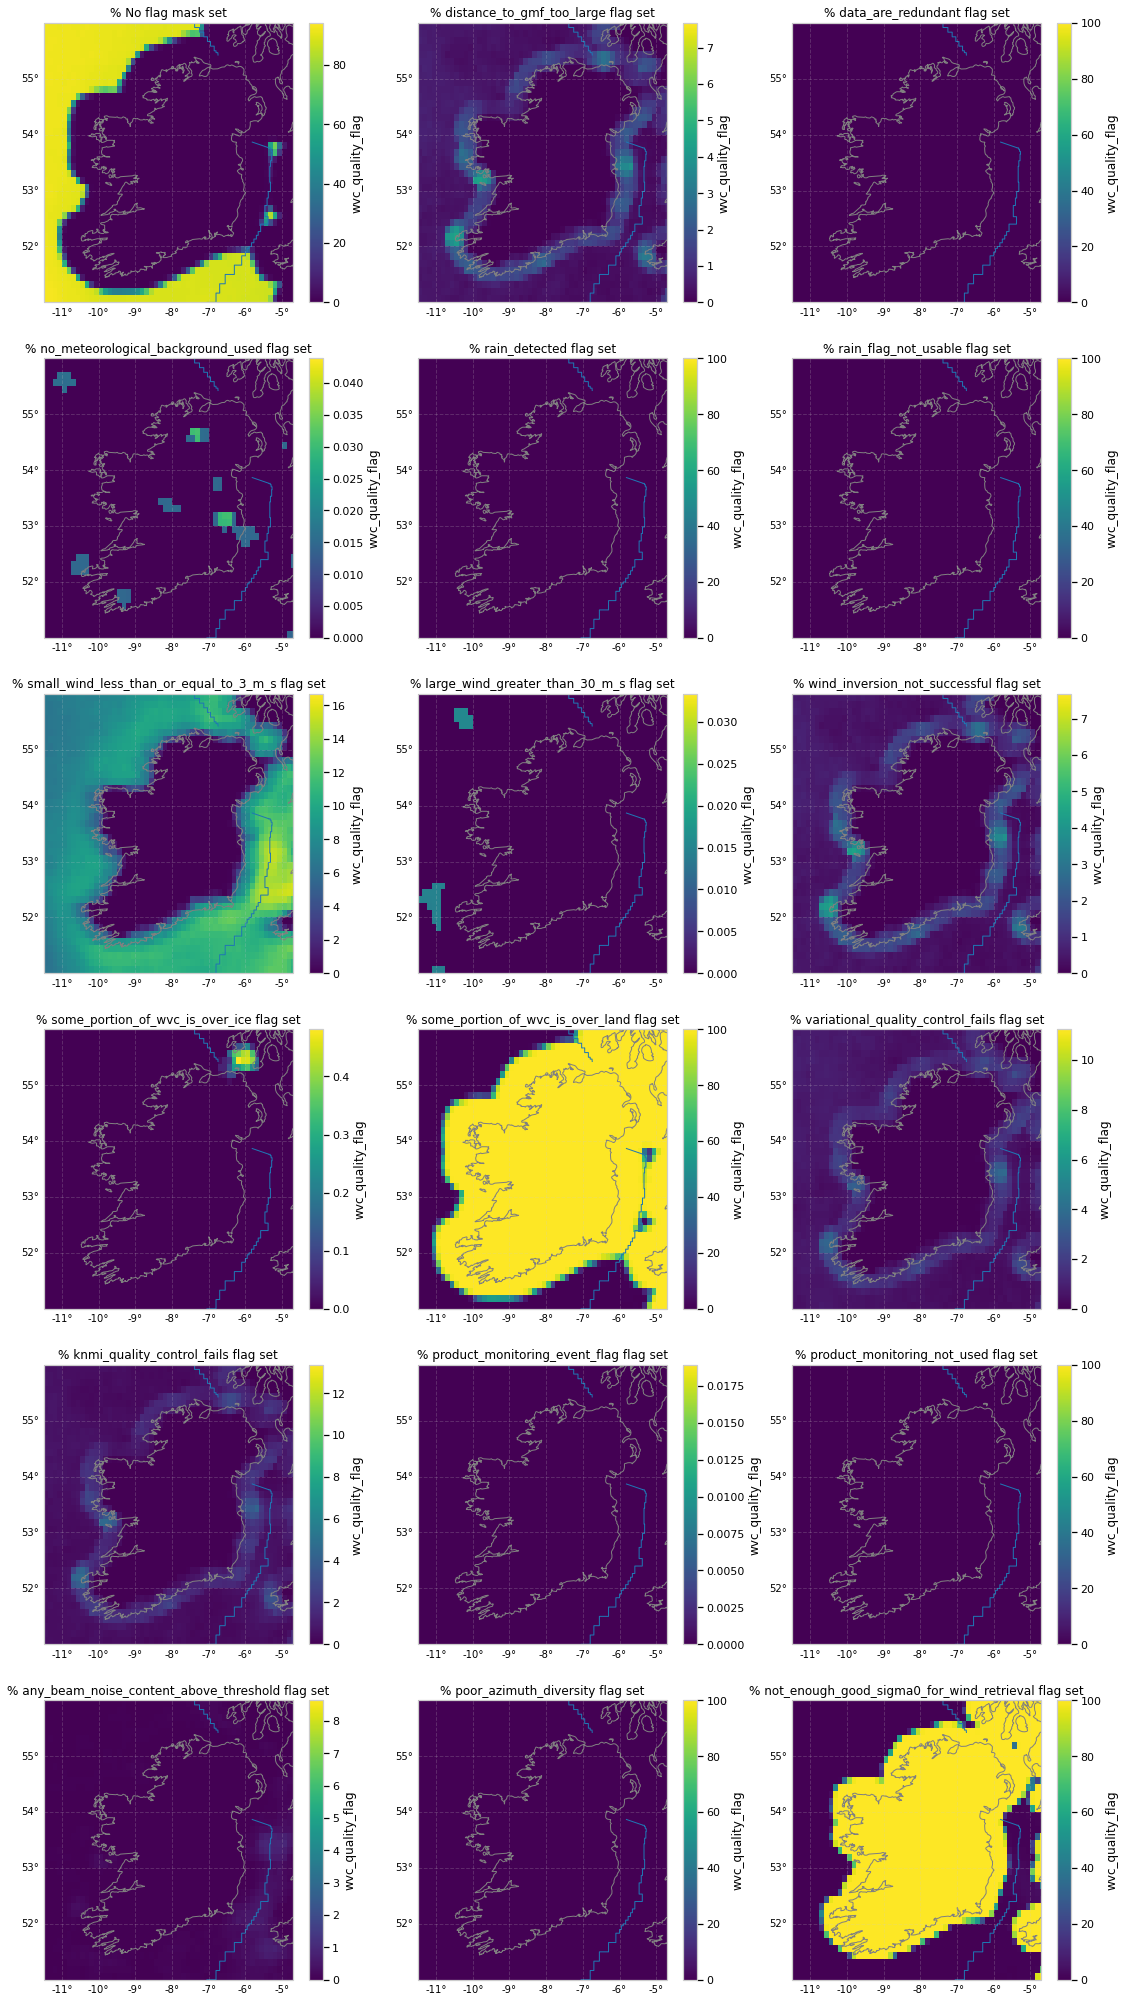

In [12]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(19, 36), subplot_kw=dict(projection=MAP_PROJECTION))
ax = ax.flatten()

total_observations = ds.wvc_quality_flag.where(ds.wvc_quality_flag.fillna(-1)!=-1).count(dim='time').compute()

quality_flag_values = {'No flag mask set': ds.wvc_quality_flag.where(lambda x:x == 0)}
quality_flag_values.update({f'{flag_meaning} flag set': ds.wvc_quality_flag.astype(int).where(lambda x:x & flag_mask) for flag_meaning, flag_mask in quality_flag_masks.items()})
                    
for i, flag_label in enumerate(list(quality_flag_values)):
    # Calculate percentage of non-zero/nan observations for each coordinate where this flag was set
    flag_percentage = (100 * (quality_flag_values[flag_label].count(dim='time', keep_attrs=True)/total_observations)).compute()
    vmax = flag_percentage.max().item()
    vmax = 100 if vmax == 0 else vmax
    plot_ics_variable(variable=flag_percentage,
                      title=f'% {flag_label}',
                      vmin=0,
                      vmax=vmax,
                      ax=ax[i])

#### Filter ASCAT data using quality flags

These grid flag percentages may suggest that the ASCAT data could be filtered using the corresponding flag masks, for example, where all combinations of the following masks would be retained:
* `wvc_quality_flag = 0`: Although this value isn't documented, it is assumed that the corresponding data is of acceptable quality
* `wvc_quality_flag = 2048`: Flags with the `'small_wind_less_than_or_equal_to_3_m_s'` mask are accepted as these ensure that coastal AOIs (e.g. [Irish Weather Buoy Network (IWB)](http://www.marine.ie/Home/site-area/data-services/real-time-observations/irish-weather-buoy-network-imos) buoys) are included, and that more suitable Weibull fits are subsequently generated.
* `wvc_quality_flag = 32768`: Flags with the `'some_portion_of_wvc_is_over_land'` mask are accepted as these ensure that coastal AOIs (e.g. IWB buoys) are included

In [13]:
retained_flag_meanings = ['small_wind_less_than_or_equal_to_3_m_s', 
                            'some_portion_of_wvc_is_over_land']
# Retain all flag mask combinations
retained_flag_masks = np.unique([sum(x) for x in itertools.combinations([0, 0] + [quality_flag_masks[x] for x in retained_flag_meanings], 2)])

filtered_ds = ds.where(ds.wvc_quality_flag.isin(retained_flag_masks))
filtered_ds

<xarray.Dataset>
Dimensions:                   (time: 12467, latitude: 97, longitude: 208,
                               height: 1)
Coordinates:
  * height                    (height) int64 10
  * latitude                  (latitude) float32 46.06 46.19 ... 57.94 58.06
  * longitude                 (longitude) float32 334.1 334.2 ... 359.8 359.9
  * time                      (time) datetime64[ns] 2007-01-01T22:00:20.35560...
Data variables: (12/26)
    air_density               (time, latitude, longitude) float32 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    bs_distance               (time, latitude, longitude) float32 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    eastward_model_stress     (time, latitude, longitude) float64 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    eastward_stress           (time, latitude, longitude) float64 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    eastward_wind             (time, latitude, longitude) float32 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    model_stress_curl         (time, latitude, longitude) float64 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    ...                        ...
    wind_divergence           (time, latitude, longitude) float64 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    wind_speed                (height, time, latitude, longitude) float32 dask.array<chunksize=(1, 1500, 97, 208), meta=np.ndarray>
    wind_stress_magnitude     (time, latitude, longitude) float64 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    wind_to_dir               (height, time, latitude, longitude) float32 dask.array<chunksize=(1, 1500, 97, 208), meta=np.ndarray>
    wvc_index                 (time, latitude, longitude) float32 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
    wvc_quality_flag          (time, latitude, longitude) float64 dask.array<chunksize=(1500, 97, 208), meta=np.ndarray>
Attributes: (12/36)
    Conventions:                      CF-1.6
    History:                          Translated to CF-1.0 Conventions by Net...
    comment:                          Orbit period and inclination are consta...
    contents:                         ovw
    creation_date:                    2021-11-05
    creation_time:                    19:16:35
    ...                               ...
    start_date:                       2021-07-31
    start_time:                       00:00:00
    stop_date:                        2021-07-31
    stop_time:                        23:59:58
    title:                            Global Ocean - Wind - METOP-A ASCAT - 1...
    title_short_name:                 ASCATA-L3-Coastal